In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Users\\LENOVO\\OneDrive\\Desktop\\data_jobs.csv")
df.job_posted_date = pd.to_datetime(df.job_posted_date)
import ast

df = df[df["job_skills"].notna()]  # Remove NaNs to avoid errors

df["job_skills"] = df["job_skills"].apply(ast.literal_eval)

In [2]:
df_da_ger = df[(df["job_title"] == "Data Analyst") & (df["job_country"] == "Germany")].copy()
df_da_ger = df_da_ger.dropna(subset=["salary_year_avg"])
df_da_ger_exploded = df_da_ger.explode("job_skills")
df_da_ger_exploded[["salary_year_avg", "job_skills"]].head(5)

,salary_year_avg,job_skills
127888,111175.0,python
127888,111175.0,javascript
127888,111175.0,r
127888,111175.0,sql
127888,111175.0,go


In [3]:
df_da_skills = df_da_ger_exploded.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)
df_da_skills = df_da_skills.rename(columns={"count": "skill_count", "median": "median_salary"})
da_job_count = len(df_da_ger)
df_da_skills["skill_percent"] = df_da_skills["skill_count"] / da_job_count *100 
skill_percent = 5
df_da_skills_high_demand = df_da_skills[df_da_skills["skill_percent"] > skill_percent]
df_da_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
python,2,111175.0,66.666667
sql,2,106837.5,66.666667
atlassian,1,102500.0,33.333333
flask,1,111175.0,33.333333
go,1,111175.0,33.333333
javascript,1,111175.0,33.333333
pyspark,1,111175.0,33.333333
r,1,111175.0,33.333333
react,1,111175.0,33.333333


In [16]:
%pip install adjustText

  Using cached adjustText-1.3.0-py3-none-any.whl.metadata (3.1 kB)
Using cached adjustText-1.3.0-py3-none-any.whl (13 kB)
Note: you may need to restart the kernel to use updated packages.


In [48]:
print(df_da_skills_high_demand.columns)


Index(['skill_count', 'median_salary', 'skill_percent'], dtype='object')


8 [ 0.91303847 -0.56056013]
10 [-0.2933697 -0.5015377]


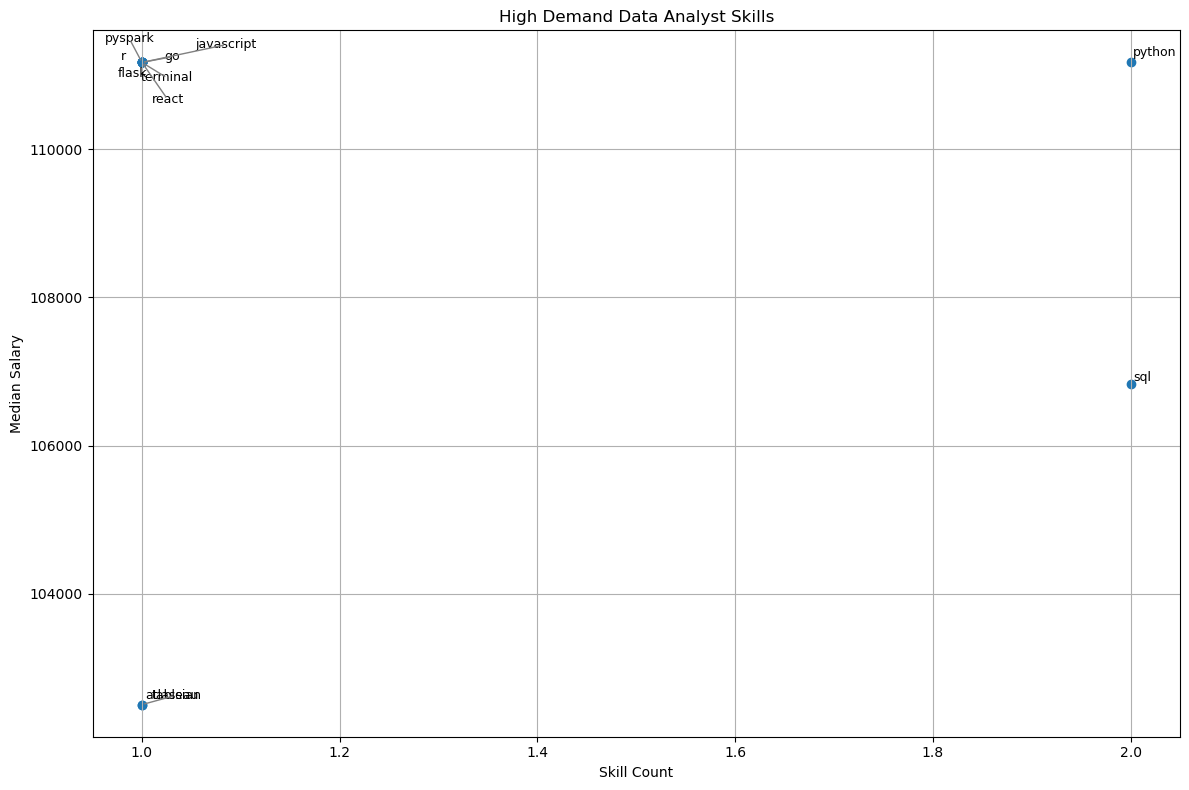

In [49]:
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot
ax.scatter(df_da_skills_high_demand["skill_count"], df_da_skills_high_demand["median_salary"])

# Add skill labels
texts = []
for skill, row in df_da_skills_high_demand.iterrows():
    texts.append(
        ax.text(row["skill_count"], row["median_salary"], skill, fontsize=9)
    )

# Smart label adjustment
adjust_text(
    texts,
    ax=ax,
    expand_points=(1.2, 1.2),   # expand space around points
    arrowprops=dict(arrowstyle="-", color='gray'),
    force_text=(0.2, 0.2),      # increase force to avoid overlap
    force_points=(0.1, 0.1),
    only_move={'points': 'y', 'text': 'xy'},  # better movement control
)

# Plot formatting
plt.title("High Demand Data Analyst Skills")
plt.xlabel("Skill Count")
plt.ylabel("Median Salary")
plt.grid(True)
plt.tight_layout()
plt.show()






